In [1]:
"""
Reference: https://www.datacamp.com/tutorial/random-forests-classifier-python
            https://www.kaggle.com/code/henriqueyamahata/bank-marketing-classification-roc-f1-recall#CHOOSED-MODEL-ANALYSIS
"""

'\nReference: https://www.datacamp.com/tutorial/random-forests-classifier-python\n            https://www.kaggle.com/code/henriqueyamahata/bank-marketing-classification-roc-f1-recall#CHOOSED-MODEL-ANALYSIS\n'

In [2]:
"""
About the bank dataset:
https://www.kaggle.com/datasets/henriqueyamahata/bank-marketing/data
"""

'\nAbout the bank dataset:\nhttps://www.kaggle.com/datasets/henriqueyamahata/bank-marketing/data\n'

### Import the libraries

In [3]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline 
import warnings 
warnings.filterwarnings('ignore')

### Processing Data

In [4]:
bank = pd.read_csv('../data/bank_dataset/bank-additional-full.csv', sep = ';') # with ubuntu => adding ../ at the root
y = pd.get_dummies(bank['y'], columns = ['y'], prefix = ['y'], drop_first = True)
bank

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [5]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [6]:
bank.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

#### Bank client data analysis and categorical treatment

In [7]:
bank_client = bank.iloc[:, 0:7] # exclusive the index 7
bank_client

,age,job,marital,education,default,housing,loan
0,56,housemaid,married,basic.4y,no,no,no
1,57,services,married,high.school,unknown,no,no
2,37,services,married,high.school,no,yes,no
3,40,admin.,married,basic.6y,no,no,no
4,56,services,married,high.school,no,no,yes
...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no
41184,46,blue-collar,married,professional.course,no,no,no
41185,56,retired,married,university.degree,no,yes,no
41186,44,technician,married,professional.course,no,no,no


In [8]:
print('Jobs:\n', bank_client['job'].unique())

Jobs:
 ['housemaid' 'services' 'admin.' 'blue-collar' 'technician' 'retired'
 'management' 'unemployed' 'self-employed' 'unknown' 'entrepreneur'
 'student']


In [9]:
print('Marital:\n', bank_client['marital'].unique())

Marital:
 ['married' 'single' 'divorced' 'unknown']


In [10]:
print('Education:\n', bank_client['education'].unique())

Education:
 ['basic.4y' 'high.school' 'basic.6y' 'basic.9y' 'professional.course'
 'unknown' 'university.degree' 'illiterate']


In [11]:
print('Default:\n', bank_client['default'].unique())
print('Housing:\n', bank_client['housing'].unique())
print('Loan:\n', bank_client['loan'].unique())

Default:
 ['no' 'unknown' 'yes']
Housing:
 ['no' 'yes' 'unknown']
Loan:
 ['no' 'yes' 'unknown']


##### 1. Age

In [12]:
print('Min age: ', bank_client['age'].min())
print('Max age: ', bank_client['age'].max())
print('Null Values: ', bank_client['age'].isnull().any())

Min age:  17
Max age:  98
Null Values:  False


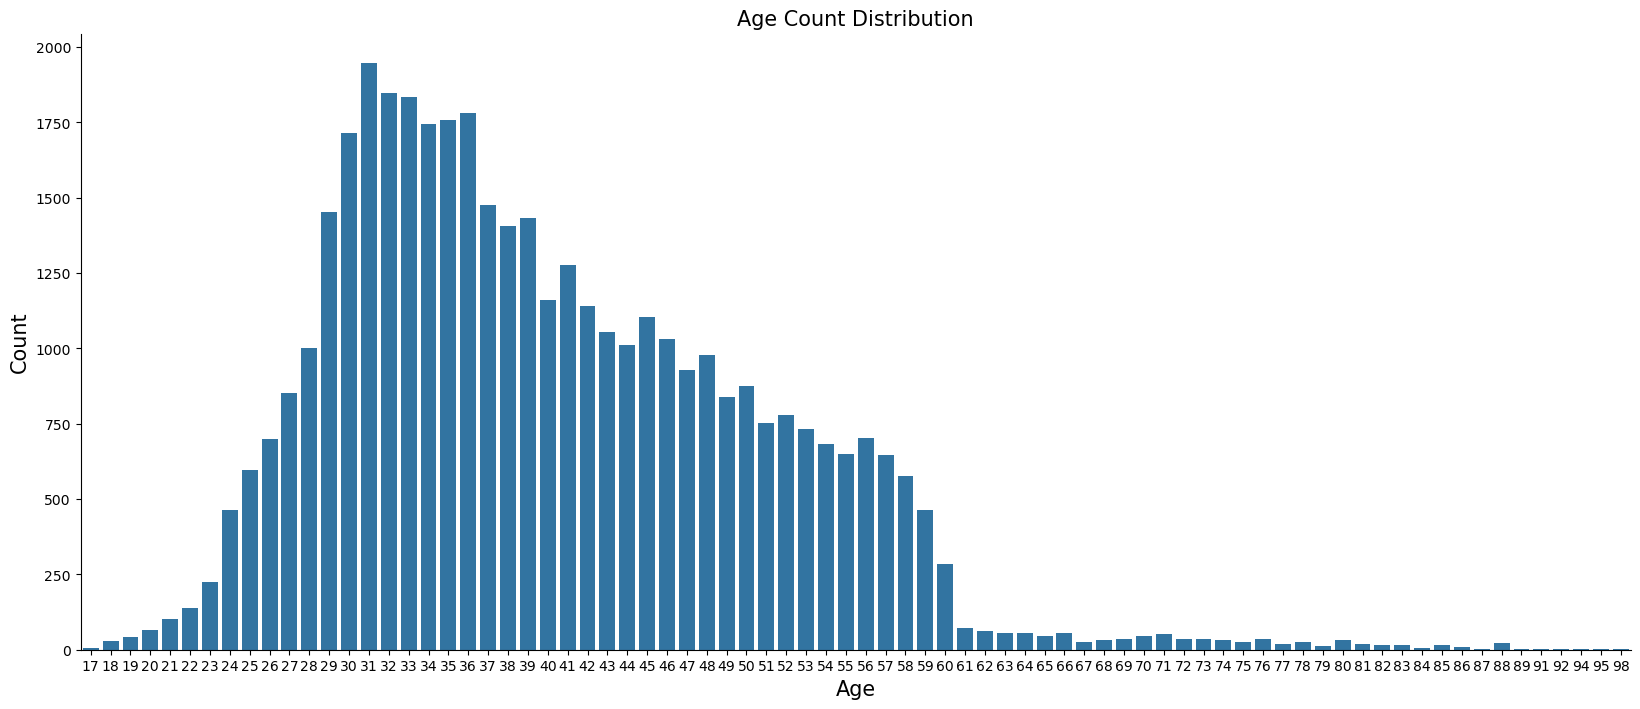

In [13]:
fig, ax = plt.subplots()
fig.set_size_inches(20, 8)
sns.countplot(x = 'age', data = bank_client)
ax.set_xlabel('Age', fontsize=15)
ax.set_ylabel('Count', fontsize=15)
ax.set_title('Age Count Distribution', fontsize=15)
sns.despine()

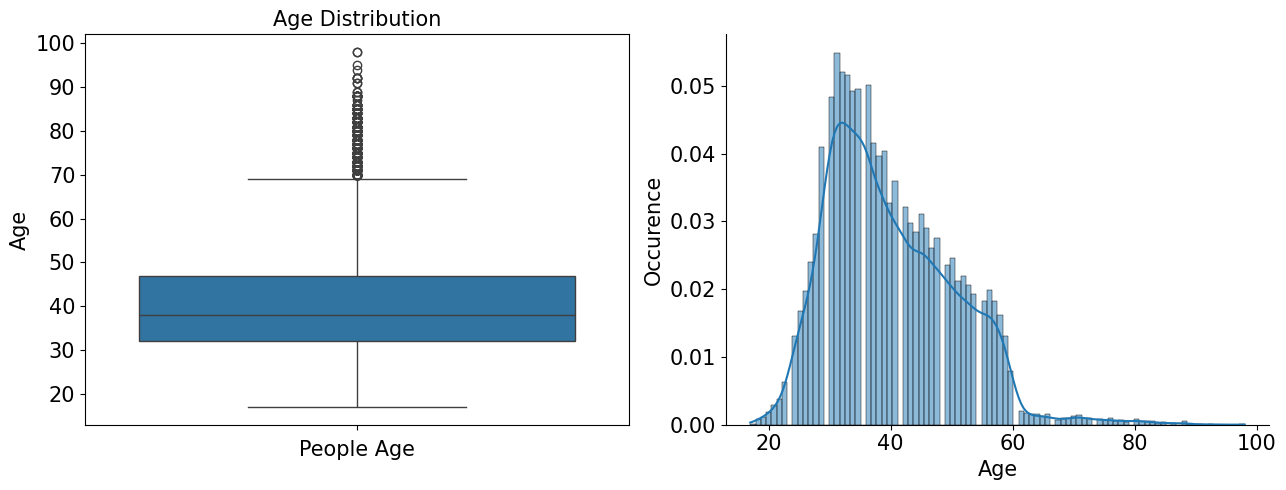

In [14]:
fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (13, 5))

sns.boxplot(y = 'age', data = bank_client, orient = 'v', ax = ax1)
ax1.set_xlabel('People Age', fontsize=15)
ax1.set_ylabel('Age', fontsize=15)
ax1.set_title('Age Distribution', fontsize=15)
ax1.tick_params(labelsize=15)

sns.histplot(bank_client['age'], stat = 'density', kde = True, ax = ax2)
sns.despine(ax = ax2)
ax2.set_xlabel('Age', fontsize=15)
ax2.set_ylabel('Occurence', fontsize=15)
ax2.tick_params(labelsize=15)

plt.subplots_adjust(wspace=0.5) # adjust space between matplotlib subplots
plt.tight_layout() # no overlapping content 

##### Determine outliers
* Quantiles are used in statistics and data analysis to understand the distribution of data and to identify outliers
* Calculate the outliers:

    * Interquartile range, IQR = Q3 - Q1
    * Lower 1.5*IQR whisker = Q1 - 1.5 * IQR
    * Upper 1.5*IQR whisker = Q3 + 1.5 * IQR

In [15]:
print('Q1: ', bank_client['age'].quantile(q = 0.25))
print('Q2: ', bank_client['age'].quantile(q = 0.50))
print('Q3: ', bank_client['age'].quantile(q = 0.75))
print('Q4: ', bank_client['age'].quantile(q = 1.00))

print('Ages above: ', bank_client['age'].quantile(q = 0.75) + 1.5*(bank_client['age'].quantile(q = 0.75) - bank_client['age'].quantile(q = 0.25)), 'are outliers.')

Q1:  32.0
Q2:  38.0
Q3:  47.0
Q4:  98.0
Ages above:  69.5 are outliers.


In [16]:
print('Number of outliers: ', bank_client[bank_client['age'] > 69.5]['age'].count())
print('Number of clients: ', len(bank_client))
print('Outliers are: ', round(bank_client[bank_client['age'] > 69.5]['age'].count()*100 / len(bank_client), 2), '%')


Number of outliers:  469
Number of clients:  41188
Outliers are:  1.14 %


In [17]:
# Calculate Mean
print('MEAN: ', round(bank_client['age'].mean(), 2))
# Calculate standard deviation
print('STD: ', round(bank_client['age'].std(), 2))
# Calculate coefficient variation
# cv < 15%, low dispersion
# cv > 30%, high dispersion
print('CV: ', round(bank_client['age'].std()*100 / bank_client['age'].mean(), 2), ', High middle dispersion')

MEAN:  40.02
STD:  10.42
CV:  26.04 , High middle dispersion


**NOTE:**

    - We cannot conclude if age have a high effect to our variable y.
    - Keep searching for some pattern.
    - High middle dispersion means we have people with all ages and maybe all of them can subscipt a term deposit.

##### 2. Jobs

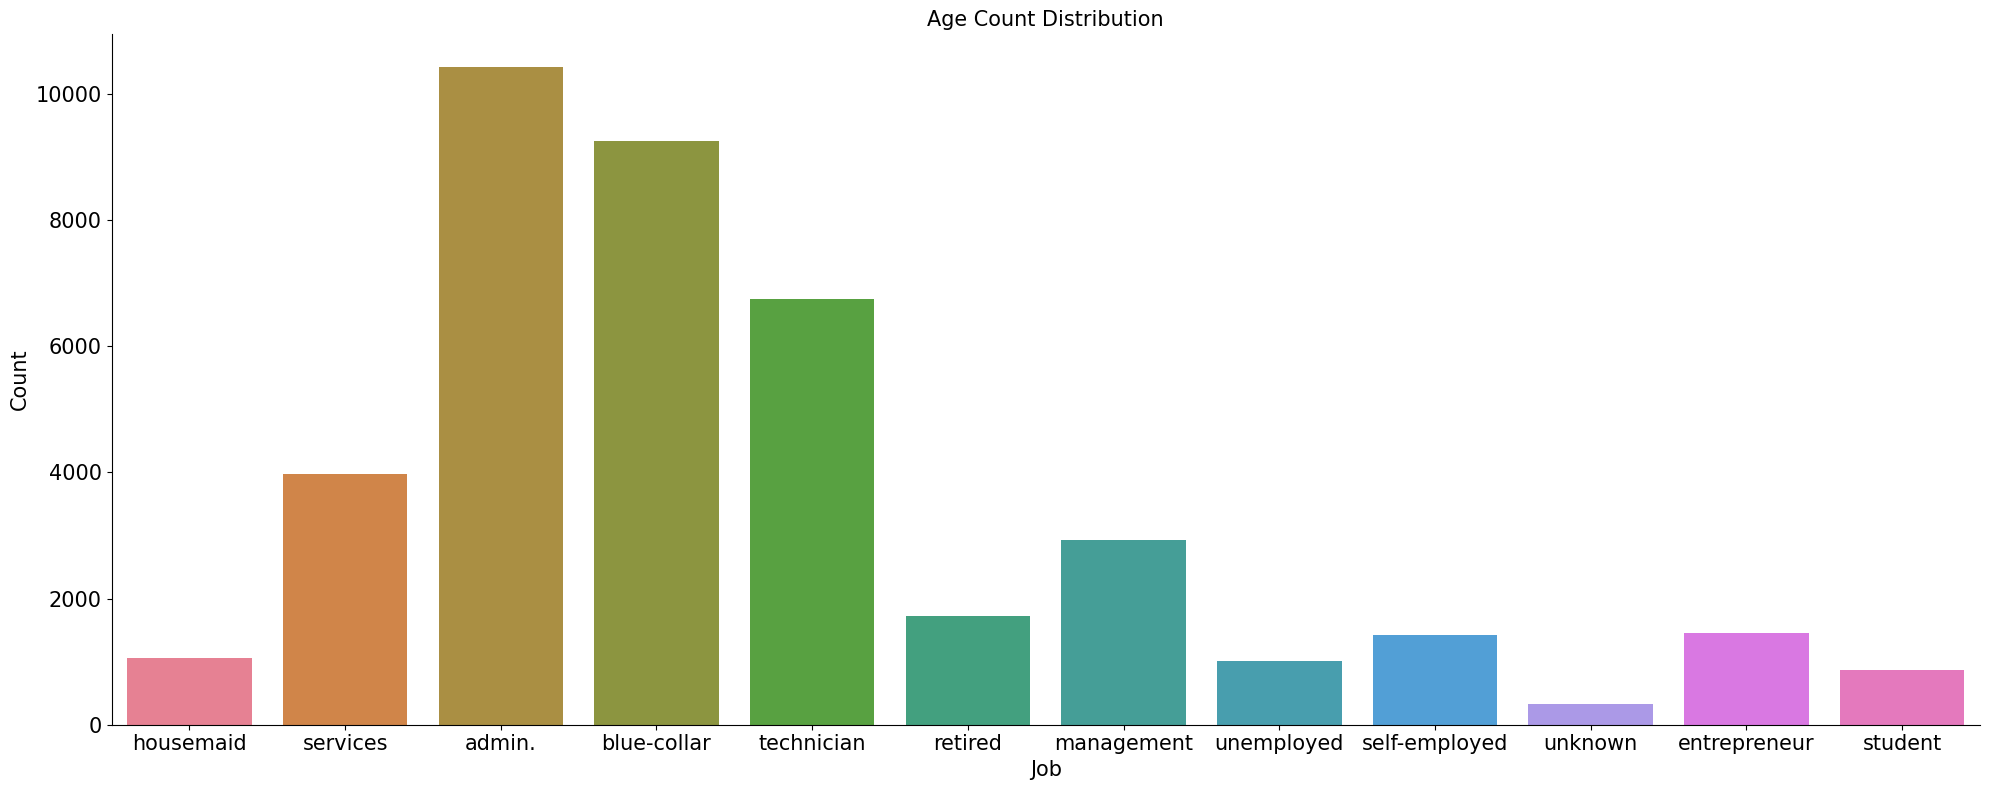

In [18]:
fig, ax = plt.subplots()
fig.set_size_inches(20, 8)
sns.countplot(x = 'job', data=bank_client, hue='job')
ax.set_xlabel('Job', fontsize=15)
ax.set_ylabel('Count', fontsize=15)
ax.set_title('Age Count Distribution', fontsize=15)
ax.tick_params(labelsize=15)
sns.despine()
plt.tight_layout()

##### 3. Marital

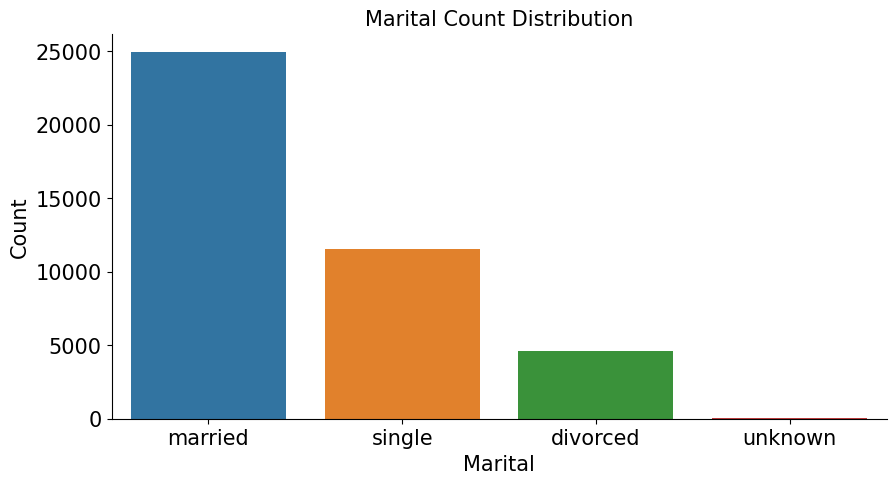

In [19]:
fig, ax = plt.subplots()
fig.set_size_inches(10, 5)
sns.countplot(x = 'marital', data=bank_client, hue='marital')
ax.set_xlabel('Marital', fontsize=15)
ax.set_ylabel('Count', fontsize=15)
ax.set_title('Marital Count Distribution', fontsize=15)
ax.tick_params(labelsize=15)
sns.despine()

##### 4. Education

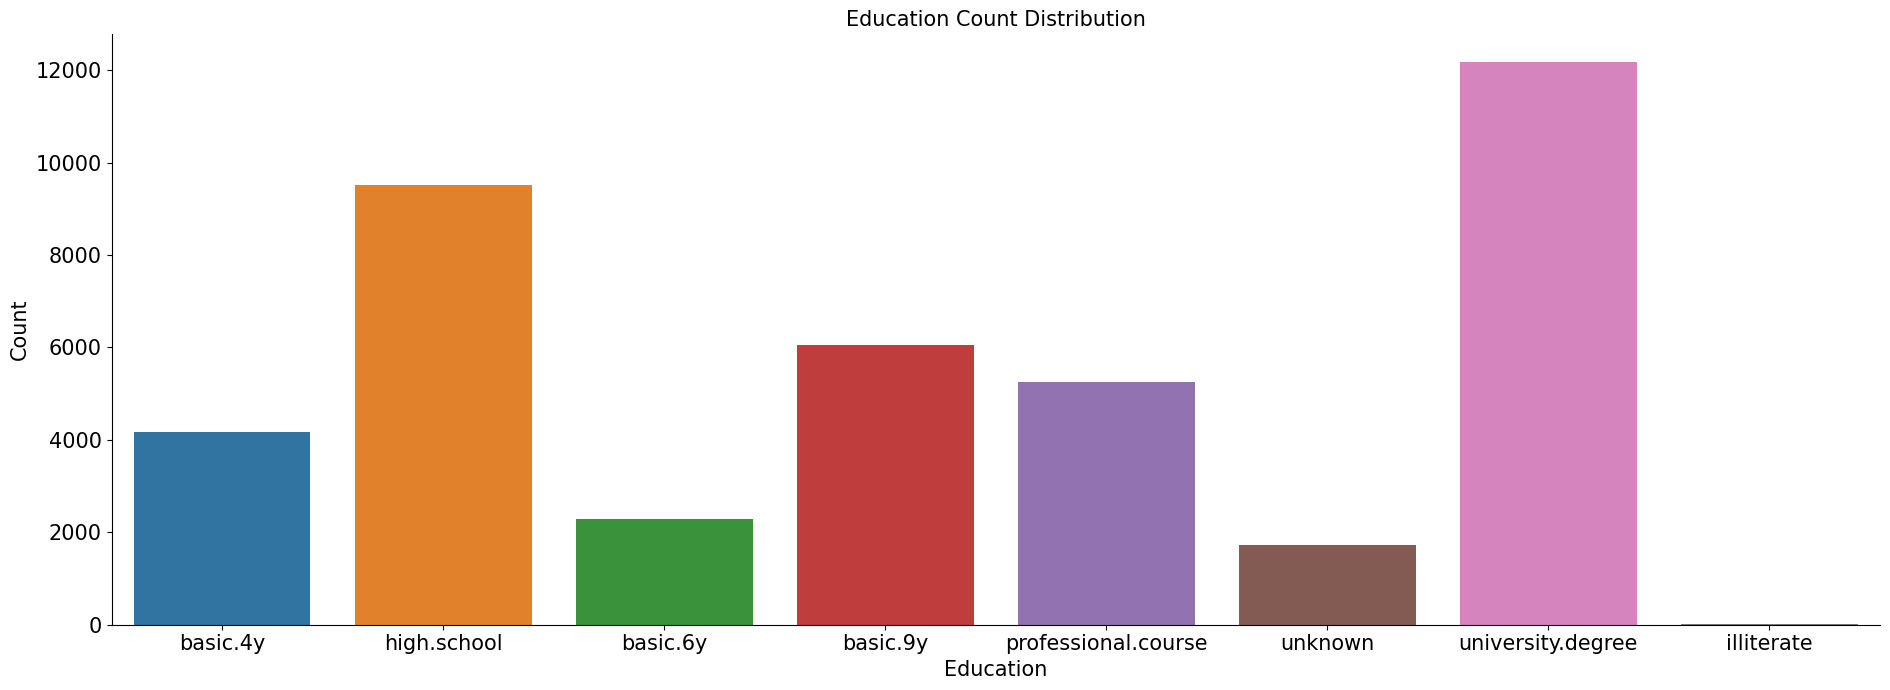

In [20]:
fig, ax = plt.subplots()
fig.set_size_inches(19, 7)
sns.countplot(x = 'education', data=bank_client, hue='education')
ax.set_xlabel('Education', fontsize=15)
ax.set_ylabel('Count', fontsize=15)
ax.set_title('Education Count Distribution', fontsize=15)
ax.tick_params(labelsize=15)
sns.despine()
plt.tight_layout()

##### 5. Default, Housing, Loan

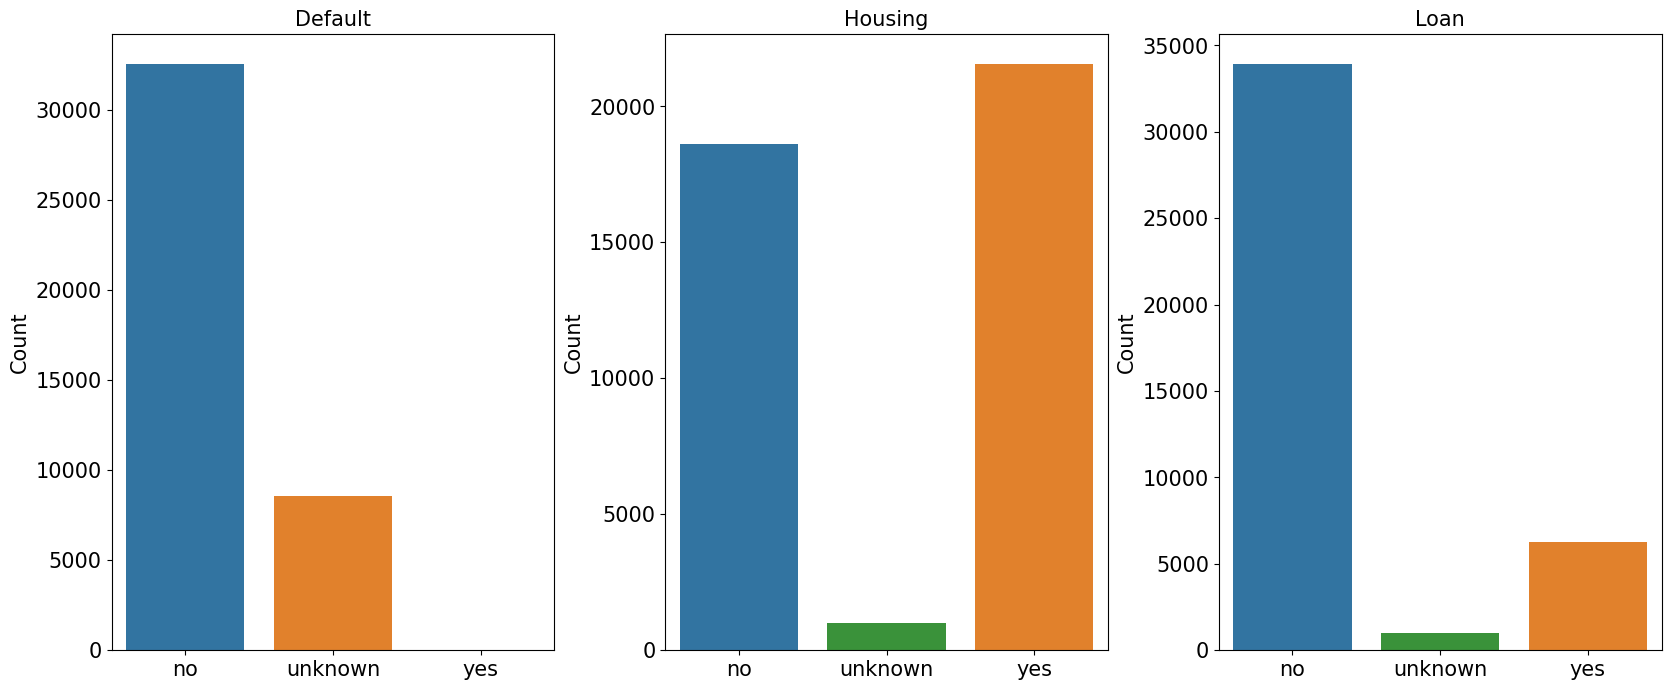

In [21]:
fig, (ax1, ax2, ax3) = plt.subplots(nrows = 1, ncols = 3, figsize = (20, 8))

sns.countplot(x = 'default', data=bank_client, ax = ax1, order = ['no', 'unknown', 'yes'], hue='default')
ax1.set_title('Default', fontsize=15)
ax1.set_xlabel('')
ax1.set_ylabel('Count', fontsize=15)
ax1.tick_params(labelsize=15)

sns.countplot(x = 'housing', data=bank_client, ax=ax2, order=['no', 'unknown', 'yes'], hue='housing')
ax2.set_title('Housing', fontsize=15)
ax2.set_xlabel('')
ax2.set_ylabel('Count', fontsize=15)
ax2.tick_params(labelsize=15)

sns.countplot(x = 'loan', data = bank_client, ax = ax3, order = ['no', 'unknown', 'yes'], hue='loan')
ax3.set_title('Loan', fontsize=15)
ax3.set_xlabel('')
ax3.set_ylabel('Count', fontsize=15)
ax3.tick_params(labelsize=15)

plt.subplots_adjust(wspace=0.25)

In [22]:
print('Default:\n No credit in default: ', bank_client[bank_client['default'] == 'no']['age'].count(),
      '\n Unknown credit in default:', bank_client[bank_client['default'] == 'unknown']['age'].count(),
      '\n Yes to credit in default:', bank_client[bank_client['default'] == 'yes']['age'].count())

Default:
 No credit in default:  32588 
 Unknown credit in default: 8597 
 Yes to credit in default: 3


In [23]:
print('Housing:\n No housing in loan:'     , bank_client[bank_client['housing'] == 'no']     ['age'].count(),
              '\n Unknown housing in loan:', bank_client[bank_client['housing'] == 'unknown']['age'].count(),
              '\n Yes to housing in loan:' , bank_client[bank_client['housing'] == 'yes']    ['age'].count())

Housing:
 No housing in loan: 18622 
 Unknown housing in loan: 990 
 Yes to housing in loan: 21576


In [24]:
print('Loan:\n No to personal loan:'     , bank_client[bank_client['housing'] == 'no']     ['age'].count(),
              '\n Unknown to personal loan:', bank_client[bank_client['housing'] == 'unknown']['age'].count(),
              '\n Yes to personal loan:' , bank_client[bank_client['housing'] == 'yes']    ['age'].count())

Loan:
 No to personal loan: 18622 
 Unknown to personal loan: 990 
 Yes to personal loan: 21576


##### 6. Bank client categorical treatment

* Converting to continuos due the feature scaling will be applyed later

In [25]:
from sklearn.preprocessing import LabelEncoder

labelencoder_X = LabelEncoder()
bank_client['job'] = labelencoder_X.fit_transform(bank_client['job'])
bank_client['marital']  = labelencoder_X.fit_transform(bank_client['marital']) 
bank_client['education']= labelencoder_X.fit_transform(bank_client['education']) 
bank_client['default']  = labelencoder_X.fit_transform(bank_client['default']) 
bank_client['housing']  = labelencoder_X.fit_transform(bank_client['housing']) 
bank_client['loan']     = labelencoder_X.fit_transform(bank_client['loan'])

In [26]:
# function to create group of ages, this helps because we have 78 different values here
def age(dataframe):
    dataframe.loc[dataframe['age'] <= 32, 'age'] = 1
    dataframe.loc[(dataframe['age'] > 32) & (dataframe['age'] <= 47), 'age'] = 2
    dataframe.loc[(dataframe['age'] > 47) & (dataframe['age'] <= 70), 'age'] = 3
    dataframe.loc[(dataframe['age'] > 70) & (dataframe['age'] <= 98), 'age'] = 4

    return dataframe

age(bank_client)

,age,job,marital,education,default,housing,loan
0,3,3,1,0,0,0,0
1,3,7,1,3,1,0,0
2,2,7,1,3,0,2,0
3,2,0,1,1,0,0,0
4,3,7,1,3,0,0,2
...,...,...,...,...,...,...,...
41183,4,5,1,5,0,2,0
41184,2,1,1,5,0,0,0
41185,3,5,1,6,0,2,0
41186,2,9,1,5,0,0,0


In [27]:
print(bank_client.shape)
bank_client.head()

(41188, 7)


,age,job,marital,education,default,housing,loan
0,3,3,1,0,0,0,0
1,3,7,1,3,1,0,0
2,2,7,1,3,0,2,0
3,2,0,1,1,0,0,0
4,3,7,1,3,0,0,2


#### Related with the last contact of the current campaign

In [28]:
bank_related = bank.iloc[: , 7:11]
bank_related

,contact,month,day_of_week,duration
0,telephone,may,mon,261
1,telephone,may,mon,149
2,telephone,may,mon,226
3,telephone,may,mon,151
4,telephone,may,mon,307
...,...,...,...,...
41183,cellular,nov,fri,334
41184,cellular,nov,fri,383
41185,cellular,nov,fri,189
41186,cellular,nov,fri,442


In [29]:
bank_related.isnull().any()

contact        False
month          False
day_of_week    False
duration       False
dtype: bool

In [30]:
print("Kind of Contact: \n", bank_related['contact'].unique())
print("\nWhich month is this campaign work: \n", bank_related['month'].unique())
print("\nWhich days of week this campaing work: \n", bank_related['day_of_week'].unique())

Kind of Contact: 
 ['telephone' 'cellular']

Which month is this campaign work: 
 ['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'mar' 'apr' 'sep']

Which days of week this campaing work: 
 ['mon' 'tue' 'wed' 'thu' 'fri']


##### 1. Duration

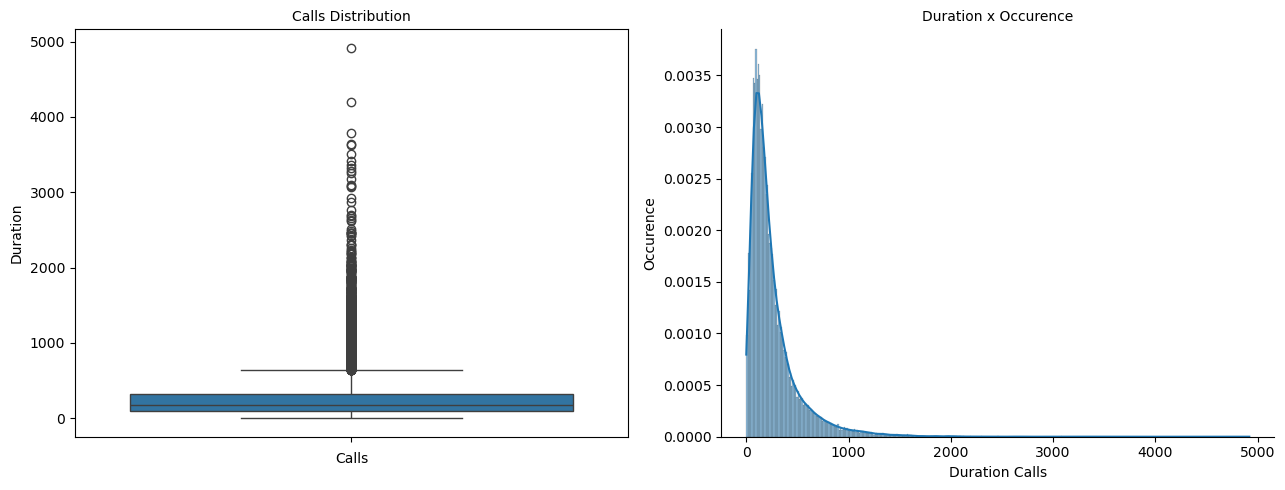

In [31]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(13, 5))

sns.boxplot(y = 'duration', data=bank_related, orient='v', ax=ax1)
ax1.set_xlabel('Calls', fontsize=10)
ax1.set_ylabel('Duration', fontsize=10)
ax1.set_title('Calls Distribution', fontsize=10)
ax1.tick_params(labelsize=10)

sns.histplot(bank_related['duration'], ax=ax2, stat='density', kde=True)
sns.despine(ax=ax2)
ax2.set_xlabel('Duration Calls', fontsize=10)
ax2.set_ylabel('Occurence', fontsize=10)
ax2.set_title('Duration x Occurence', fontsize=10)
ax2.tick_params(labelsize=10)

plt.subplots_adjust(wspace=0.5)
plt.tight_layout()

In [32]:
print("Max duration call in minute: ", round((bank_related['duration'].max()/60), 1))
print("Min duration  call in minutes:   ", round((bank_related['duration'].min()/60),1))
print("Mean duration call in minutes:   ", round((bank_related['duration'].mean()/60),1))
print("STD duration  call in minutes:   ", round((bank_related['duration'].std()/60),1))
# Std close to the mean means that the data values are close to the mean 

Max duration call in minute:  82.0
Min duration  call in minutes:    0.0
Mean duration call in minutes:    4.3
STD duration  call in minutes:    4.3


In [33]:
print('Q1: ', bank_related['duration'].quantile(q = 0.25))
print('Q2: ', bank_related['duration'].quantile(q = 0.5))
print('Q3: ', bank_related['duration'].quantile(q = 0.75))
print('Q4: ', bank_related['duration'].quantile(q = 1))

print('Duration calls above: ', bank_related['duration'].quantile(q = 0.75) +
      1.5*(bank_related['duration'].quantile(q=0.75) - 
           bank_related['duration'].quantile(q=0.25)), 'are outliers')

Q1:  102.0
Q2:  180.0
Q3:  319.0
Q4:  4918.0
Duration calls above:  644.5 are outliers


In [34]:
print('Number of outliers: ', bank_related[bank_related['duration'] > 644.5]['duration'].count())
print('Number of clients: ', len(bank_related))
print('Outliers are:', round(bank_related[bank_related['duration'] > 644.5]['duration'].count() * 100 / len(bank_related), 2), '%')

Number of outliers:  2963
Number of clients:  41188
Outliers are: 7.19 %


In [35]:
# These lines will be deleted later
bank[(bank['duration'] == 0)]

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
6251,39,admin.,married,high.school,no,yes,no,telephone,may,tue,...,4,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
23031,59,management,married,university.degree,no,yes,no,cellular,aug,tue,...,10,999,0,nonexistent,1.4,93.444,-36.1,4.965,5228.1,no
28063,53,blue-collar,divorced,high.school,no,yes,no,cellular,apr,fri,...,3,999,0,nonexistent,-1.8,93.075,-47.1,1.479,5099.1,no
33015,31,blue-collar,married,basic.9y,no,no,no,cellular,may,mon,...,2,999,0,nonexistent,-1.8,92.893,-46.2,1.299,5099.1,no


##### 2. Contact, Month, Day of Week

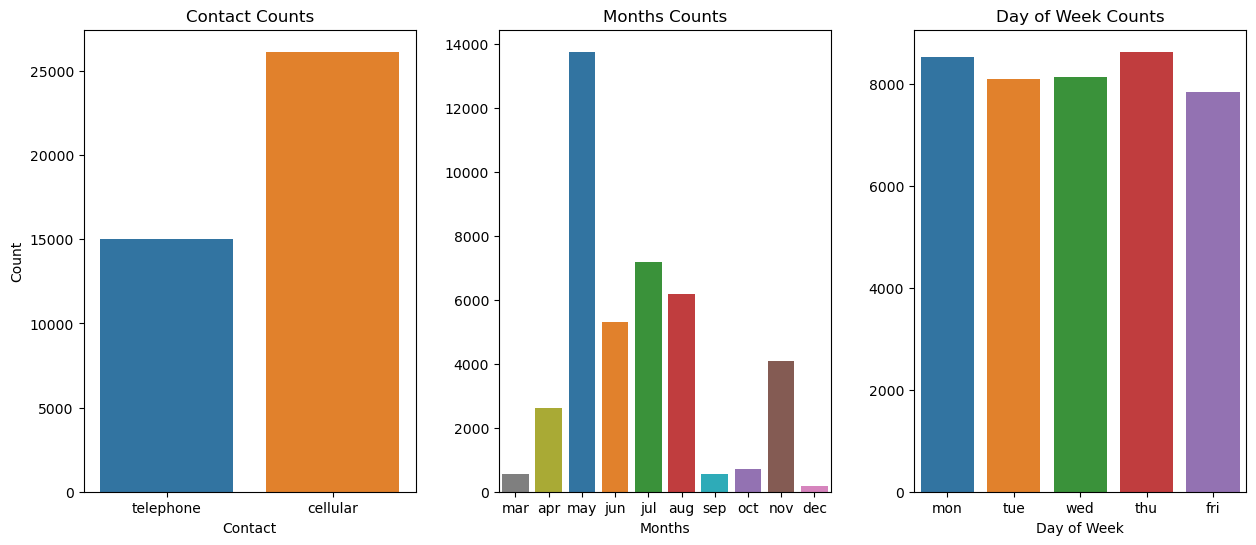

In [36]:
fig, (ax1, ax2, ax3) = plt.subplots(nrows = 1, ncols = 3, figsize=(15, 6))

sns.countplot(x = 'contact', data=bank_related, hue='contact', ax = ax1)
ax1.set_xlabel('Contact', fontsize=10)
ax1.set_ylabel('Count', fontsize=10)
ax1.set_title('Contact Counts')
ax1.tick_params(labelsize=10)

sns.countplot(x = 'month', hue='month', data=bank_related, ax = ax2, order = ['mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec'])
ax2.set_xlabel('Months', fontsize = 10)
ax2.set_ylabel('')
ax2.set_title('Months Counts')
ax2.tick_params(labelsize=10)

sns.countplot(x = 'day_of_week', hue='day_of_week', data=bank_related, ax = ax3)
ax3.set_xlabel('Day of Week', fontsize = 10)
ax3.set_ylabel('')
ax3.set_title('Day of Week Counts')
ax3.tick_params(labelsize=10)

plt.subplots_adjust(wspace=0.25)

In [37]:
print('Duration above: ', bank_related['duration'].quantile(q=0.75)
      + 1.5*(bank_related['duration'].quantile(q=0.75) - bank_related['duration'].quantile(q=0.25)), 'are outliers.')

Duration above:  644.5 are outliers.


In [38]:
bank_related[bank_related['duration'] > 640].count()

contact        3008
month          3008
day_of_week    3008
duration       3008
dtype: int64

* Contact, Month, Day of Week treatment

In [39]:
bank_related['contact']     = labelencoder_X.fit_transform(bank_related['contact']) 
bank_related['month']       = labelencoder_X.fit_transform(bank_related['month']) 
bank_related['day_of_week'] = labelencoder_X.fit_transform(bank_related['day_of_week'])

In [40]:
bank_related

,contact,month,day_of_week,duration
0,1,6,1,261
1,1,6,1,149
2,1,6,1,226
3,1,6,1,151
4,1,6,1,307
...,...,...,...,...
41183,0,7,0,334
41184,0,7,0,383
41185,0,7,0,189
41186,0,7,0,442


In [41]:
print('Q1: ', bank_related['duration'].quantile(q=0.25))
print('Q2: ', bank_related['duration'].quantile(q=0.5))
print('Q3: ', bank_related['duration'].quantile(q=0.75))
print('Q4: ', bank_related['duration'].quantile(q=1))

Q1:  102.0
Q2:  180.0
Q3:  319.0
Q4:  4918.0


In [42]:
# Like those ages, we do the same method with durations
def duration(data):
    data.loc[data['duration'] <= 102, 'duration'] = 1
    data.loc[(data['duration'] > 102) & (data['duration'] <= 180), 'duration'] = 2
    data.loc[(data['duration'] > 180) & (data['duration'] <= 319), 'duration'] = 3
    data.loc[(data['duration'] > 319) & (data['duration'] <= 644.5), 'duration'] = 4
    data.loc[data['duration'] > 644.5, 'duration'] = 5

duration(bank_related)

In [43]:
bank_related

,contact,month,day_of_week,duration
0,1,6,1,3
1,1,6,1,2
2,1,6,1,3
3,1,6,1,2
4,1,6,1,3
...,...,...,...,...
41183,0,7,0,4
41184,0,7,0,4
41185,0,7,0,3
41186,0,7,0,4


#### Social and economic context attributes

In [44]:
bank_se = bank.loc[:, ['emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']]
bank_se.head()

,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,1.1,93.994,-36.4,4.857,5191.0
1,1.1,93.994,-36.4,4.857,5191.0
2,1.1,93.994,-36.4,4.857,5191.0
3,1.1,93.994,-36.4,4.857,5191.0
4,1.1,93.994,-36.4,4.857,5191.0


#### Other attributes

In [45]:
bank_o = bank.loc[: , ['campaign', 'pdays','previous', 'poutcome']]
bank_o.head()

,campaign,pdays,previous,poutcome
0,1,999,0,nonexistent
1,1,999,0,nonexistent
2,1,999,0,nonexistent
3,1,999,0,nonexistent
4,1,999,0,nonexistent


In [46]:
bank_o['poutcome'].unique()

array(['nonexistent', 'failure', 'success'], dtype=object)

In [47]:
bank_o['poutcome'].replace(['nonexistent', 'failure', 'success'], [1, 2, 3], inplace=True)

### Model

In [48]:
bank_final = pd.concat([bank_client, bank_related, bank_se, bank_o], axis=1)
bank_final.shape

(41188, 20)

In [49]:
bank_final.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed',
       'campaign', 'pdays', 'previous', 'poutcome'],
      dtype='object')

In [50]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(bank_final, y, test_size = 0.2, random_state=123)

from sklearn.model_selection import KFold 
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score

k_fold = KFold(n_splits=10, shuffle=True, random_state=0)

In [51]:
X_train.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,campaign,pdays,previous,poutcome
5402,2,2,1,3,0,0,0,1,6,0,2,1.1,93.994,-36.4,4.857,5191.0,2,999,0,1
40128,1,7,2,5,0,0,0,0,3,3,3,-1.7,94.215,-40.3,0.835,4991.6,3,999,1,2
11388,2,1,1,7,0,2,0,1,4,0,1,1.4,94.465,-41.8,4.959,5228.1,5,999,0,1
16361,1,1,2,2,1,2,0,0,3,4,4,1.4,93.918,-42.7,4.963,5228.1,2,999,0,1
23389,2,9,1,6,0,0,0,0,1,4,2,1.4,93.444,-36.1,4.964,5228.1,4,999,0,1


In [52]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [53]:
from sklearn.linear_model import LogisticRegression

logmodel = LogisticRegression()
logmodel.fit(X_train, y_train)
logpred = logmodel.predict(X_test)

print(confusion_matrix(y_test, logpred))
print(round(accuracy_score(y_test, logpred), 2)*100)
LOGCV = (cross_val_score(logmodel, X_train, y_train, cv=k_fold, n_jobs=1, scoring='accuracy').mean())

[[7128  170]
 [ 567  373]]
91.0


k = 1 87.93 (+/- 0.57)
k = 2 89.61 (+/- 0.49)
k = 3 89.34 (+/- 0.60)
k = 4 89.83 (+/- 0.50)
k = 5 89.87 (+/- 0.44)
k = 6 90.05 (+/- 0.56)
k = 7 90.12 (+/- 0.57)
k = 8 90.25 (+/- 0.55)
k = 9 90.34 (+/- 0.49)
k = 10 90.33 (+/- 0.51)
k = 11 90.34 (+/- 0.45)
k = 12 90.38 (+/- 0.54)
k = 13 90.39 (+/- 0.50)
k = 14 90.40 (+/- 0.54)
k = 15 90.45 (+/- 0.59)
k = 16 90.40 (+/- 0.64)
k = 17 90.46 (+/- 0.62)
k = 18 90.42 (+/- 0.65)
k = 19 90.41 (+/- 0.63)
k = 20 90.42 (+/- 0.65)
k = 21 90.43 (+/- 0.59)
k = 22 90.39 (+/- 0.59)
k = 23 90.38 (+/- 0.56)
k = 24 90.33 (+/- 0.54)
k = 25 90.32 (+/- 0.51)
The optimal number of neighbors is 16 with 90.5%


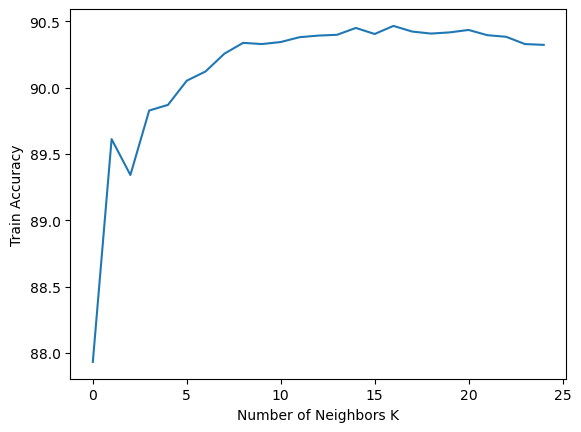

In [54]:
from sklearn import model_selection
from sklearn.neighbors import KNeighborsClassifier

X_trainK, X_testK, y_trainK, y_testK = train_test_split(bank_final, y, test_size = 0.2, random_state=123)

neighbors = np.arange(0, 25)
cv_scores = []

for k in neighbors:
    k_value = k + 1
    knn = KNeighborsClassifier(n_neighbors = k_value, weights='uniform', p=2, metric='euclidean')
    kfold = model_selection.KFold(n_splits=10, shuffle=True, random_state=123)
    scores = model_selection.cross_val_score(knn, X_trainK, y_trainK, cv=kfold, scoring='accuracy')
    cv_scores.append(scores.mean()*100)
    print("k = %d %0.2f (+/- %0.2f)" % (k_value, scores.mean()*100, scores.std()*100))

optimal_k = neighbors[cv_scores.index(max(cv_scores))]
print("The optimal number of neighbors is %d with %0.1f%%" % (optimal_k, cv_scores[optimal_k]))

plt.plot(neighbors, cv_scores)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Train Accuracy')
plt.show()

In [55]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=16)
knn.fit(X_train, y_train)
knnpred = knn.predict(X_test)

print(confusion_matrix(y_test, knnpred))
print(round(accuracy_score(y_test, knnpred), 2)*100)
KNNCV = (cross_val_score(knn, X_train, y_train, cv=k_fold, n_jobs=1, scoring='accuracy').mean())

[[7169  129]
 [ 661  279]]
90.0


In [56]:
from sklearn.svm import SVC
svc = SVC(kernel='sigmoid')
svc.fit(X_train, y_train)
svcpred = svc.predict(X_test)
print(confusion_matrix(y_test, svcpred))
print(round(accuracy_score(y_test, svcpred), 2)*100)
SVCCV = (cross_val_score(svc, X_train, y_train, cv=k_fold, n_jobs=1, scoring='accuracy').mean())

[[6703  595]
 [ 614  326]]
85.0


In [57]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(criterion='gini') #criterion = entopy, gini
dtree.fit(X_train, y_train)
dtreepred = dtree.predict(X_test)

print(confusion_matrix(y_test, dtreepred))
print(round(accuracy_score(y_test, dtreepred),2)*100)
DTREECV = (cross_val_score(dtree, X_train, y_train, cv=k_fold, n_jobs=1, scoring = 'accuracy').mean())

[[6772  526]
 [ 464  476]]
88.0


In [58]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators = 200)#criterion = entopy,gini
rfc.fit(X_train, y_train)
rfcpred = rfc.predict(X_test)

print(confusion_matrix(y_test, rfcpred ))
print(round(accuracy_score(y_test, rfcpred),2)*100)
RFCCV = (cross_val_score(rfc, X_train, y_train, cv=k_fold, n_jobs=1, scoring = 'accuracy').mean())

[[6993  305]
 [ 445  495]]
91.0


In [59]:
from sklearn.naive_bayes import GaussianNB
gaussiannb= GaussianNB()
gaussiannb.fit(X_train, y_train)
gaussiannbpred = gaussiannb.predict(X_test)
probs = gaussiannb.predict(X_test)

print(confusion_matrix(y_test, gaussiannbpred ))
print(round(accuracy_score(y_test, gaussiannbpred),2)*100)
GAUSIAN = (cross_val_score(gaussiannb, X_train, y_train, cv=k_fold, n_jobs=1, scoring = 'accuracy').mean())

[[6434  864]
 [ 398  542]]
85.0


In [60]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(X_train, y_train)
xgbprd = xgb.predict(X_test)

print(confusion_matrix(y_test, xgbprd ))
print(round(accuracy_score(y_test, xgbprd),2)*100)
XGB = (cross_val_score(estimator = xgb, X = X_train, y = y_train, cv = 10).mean())

[[6988  310]
 [ 438  502]]
91.0


In [61]:
from sklearn.ensemble import GradientBoostingClassifier
gbk = GradientBoostingClassifier()
gbk.fit(X_train, y_train)
gbkpred = gbk.predict(X_test)
print(confusion_matrix(y_test, gbkpred ))
print(round(accuracy_score(y_test, gbkpred),2)*100)
GBKCV = (cross_val_score(gbk, X_train, y_train, cv=k_fold, n_jobs=1, scoring = 'accuracy').mean())

[[7026  272]
 [ 452  488]]
91.0


In [62]:
models = pd.DataFrame({
                'Models': ['Random Forest Classifier', 'Decision Tree Classifier', 'Support Vector Machine',
                           'K-Near Neighbors', 'Logistic Model', 'Gausian NB', 'XGBoost', 'Gradient Boosting'],
                'Score':  [RFCCV, DTREECV, SVCCV, KNNCV, LOGCV, GAUSIAN, XGB, GBKCV]})

models.sort_values(by='Score', ascending=False)

,Models,Score
7,Gradient Boosting,0.913354
6,XGBoost,0.911017
4,Logistic Model,0.908134
0,Random Forest Classifier,0.907769
3,K-Near Neighbors,0.901184
1,Decision Tree Classifier,0.882337
2,Support Vector Machine,0.855933
5,Gausian NB,0.843945


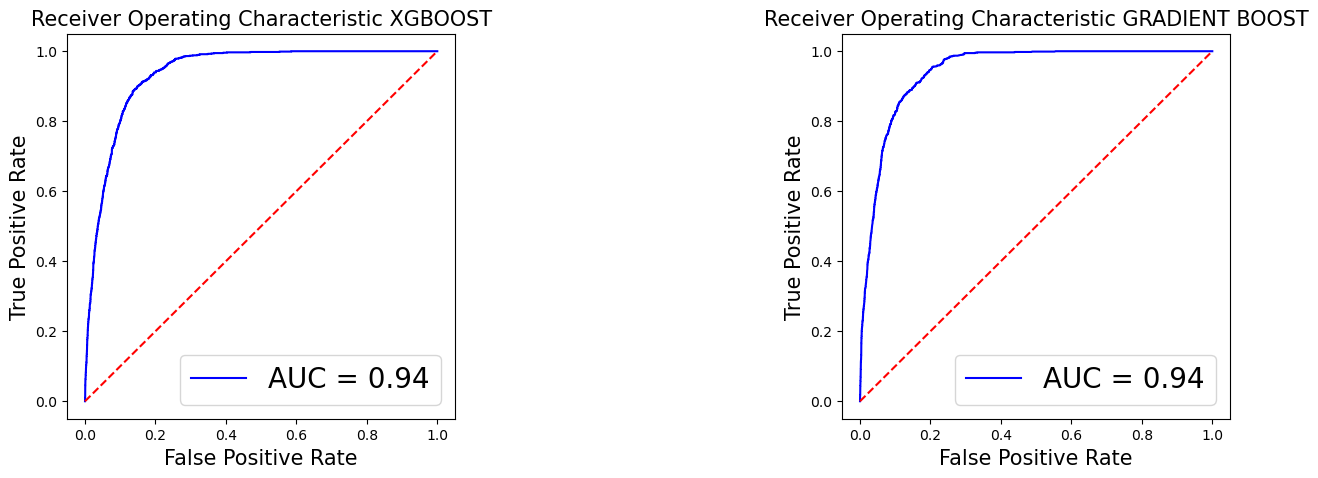

In [63]:
from sklearn import metrics
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(15,5))

probs = xgb.predict_proba(X_test) # probs contains the probability of being 0 (first column of array) vs 1 (2nd column of array)
preds = probs[:,1]
fprxgb, tprxgb, thresholdxgb = metrics.roc_curve(y_test, preds)
roc_aucxgb = metrics.auc(fprxgb, tprxgb)

ax1.plot(fprxgb, tprxgb, 'b', label='AUC = %0.2f' % roc_aucxgb)
ax1.plot([0, 1], [0, 1], 'r--')
ax1.set_title('Receiver Operating Characteristic XGBOOST', fontsize=15)
ax1.set_ylabel('True Positive Rate', fontsize=15)
ax1.set_xlabel('False Positive Rate', fontsize=15)
ax1.legend(loc='lower right', prop={'size': 20})

probs = gbk.predict_proba(X_test)
preds = probs[:, 1]
fprgbk, tprgbk, thresholdgbk = metrics.roc_curve(y_test, preds)
roc_aucgbk = metrics.auc(fprgbk, tprgbk)

ax2.plot(fprgbk, tprgbk, 'b', label='AUC = %0.2f' % roc_aucgbk)
ax2.plot([0, 1], [0, 1], 'r--')
ax2.set_title('Receiver Operating Characteristic GRADIENT BOOST', fontsize=15)
ax2.set_ylabel('True Positive Rate', fontsize=15)
ax2.set_xlabel('False Positive Rate', fontsize=15)
ax2.legend(loc='lower right', prop={'size': 20})

plt.subplots_adjust(wspace=1)

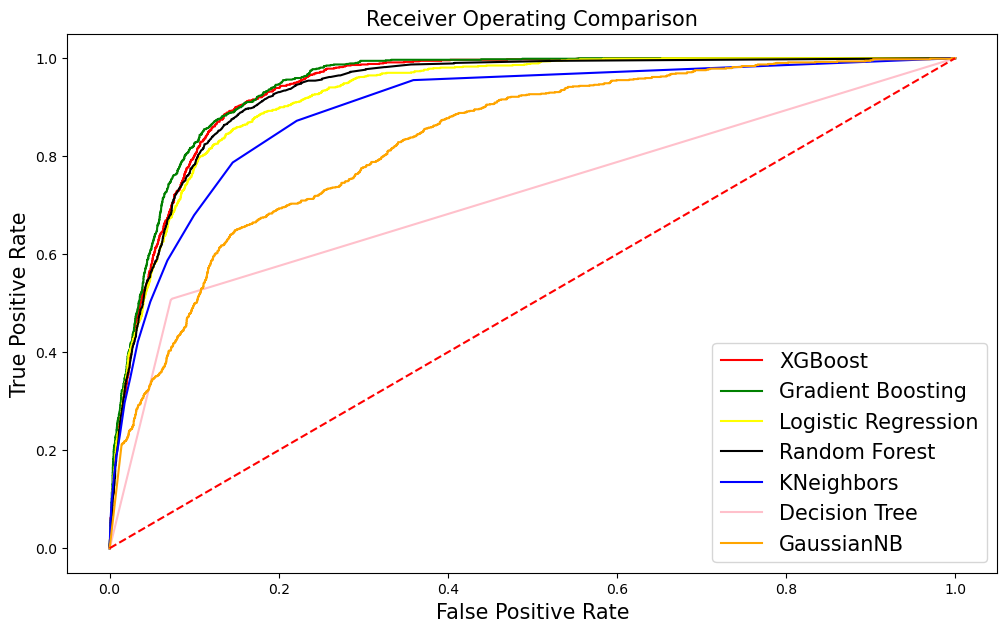

In [78]:
fig, ax = plt.subplots(figsize=(12,7))

probs1 = xgb.predict_proba(X_test) # probs contains the probability of being 0 (first column of array) vs 1 (2nd column of array)
preds1 = probs1[:,1]
fprxgb, tprxgb, thresholdxgb = metrics.roc_curve(y_test, preds1)
roc_aucxgb = metrics.auc(fprxgb, tprxgb)

probs2 = gbk.predict_proba(X_test)
preds2 = probs2[:, 1]
fprgbk, tprgbk, thresholdgbk = metrics.roc_curve(y_test, preds2)
roc_aucgbk = metrics.auc(fprgbk, tprgbk)

probs3 = logmodel.predict_proba(X_test)
preds3 = probs3[:,1]
fprlog, tprlog, thresholdlog = metrics.roc_curve(y_test,preds3)
roc_auclog = metrics.auc(fprlog, tprlog)

probs4 = rfc.predict_proba(X_test)
preds4 = probs4[:,1]
fprrfc, tprrfc, thresholdrfc = metrics.roc_curve(y_test, preds4)
roc_aucrfc = metrics.auc(fprrfc, tprrfc)

probs5 = knn.predict_proba(X_test)
preds5 = probs5[:,1]
fprknn, tprknn, thresholdknn = metrics.roc_curve(y_test, preds5)
roc_aucknn = metrics.auc(fprknn, tprknn)

probs6 = dtree.predict_proba(X_test)
preds6 = probs6[:,1]
fprdtree, tprdtree, thresholddtree = metrics.roc_curve(y_test, preds6)
roc_aucdtree = metrics.auc(fprdtree, tprdtree)

# probs7 = svc.predict_proba(X_test)
# preds7 = probs7[:,1]
# fprsvc, tprsvc, thresholdsvc = metrics.roc_curve(y_test, preds7)
# roc_aucsvc = metrics.auc(fprsvc, tprsvc)

probs8 = gaussiannb.predict_proba(X_test)
preds8 = probs8[:,1]
fprgau, tprgau, thresholdgau = metrics.roc_curve(y_test, preds8)
roc_aucgau = metrics.auc(fprgau, tprgau)

ax.plot(fprxgb, tprxgb, label = 'XGBoost', color='red')
ax.plot(fprgbk, tprgbk, label = 'Gradient Boosting', color='green')
ax.plot(fprlog, tprlog, label = 'Logistic Regression', color='yellow')
ax.plot(fprrfc, tprrfc, label = 'Random Forest', color='black')
ax.plot(fprknn, tprknn, label = 'KNeighbors', color='blue')
ax.plot(fprdtree, tprdtree, label = 'Decision Tree', color='pink')
# ax.plot(fprsvc, tprsvc, 'b', label = 'SVC', color='grey')
ax.plot(fprgau, tprgau, label = 'GaussianNB', color='orange')
ax.set_title('Receiver Operating Comparison', fontsize=15)
ax.set_ylabel('True Positive Rate', fontsize=15)
ax.set_xlabel('False Positive Rate', fontsize=15)
ax.plot([0, 1], [0, 1], 'r--')
ax.legend(loc='lower right', prop={'size': 15})

plt.show();

In [88]:
from sklearn.metrics import classification_report

print('XGBoost: \n', classification_report(y_test, xgbprd))
print('Gradient Boosting: \n', classification_report(y_test, gbkpred))

XGBoost: 
               precision    recall  f1-score   support

       False       0.94      0.96      0.95      7298
        True       0.62      0.53      0.57       940

    accuracy                           0.91      8238
   macro avg       0.78      0.75      0.76      8238
weighted avg       0.90      0.91      0.91      8238

Gradient Boosting: 
               precision    recall  f1-score   support

       False       0.94      0.96      0.95      7298
        True       0.64      0.52      0.57       940

    accuracy                           0.91      8238
   macro avg       0.79      0.74      0.76      8238
weighted avg       0.91      0.91      0.91      8238



In [87]:
print('Logistic Regression: \n', classification_report(y_test, logpred))
print('Random Forest: \n', classification_report(y_test, rfcpred))

Logistic Regression: 
               precision    recall  f1-score   support

       False       0.93      0.98      0.95      7298
        True       0.69      0.40      0.50       940

    accuracy                           0.91      8238
   macro avg       0.81      0.69      0.73      8238
weighted avg       0.90      0.91      0.90      8238

Random Forest: 
               precision    recall  f1-score   support

       False       0.94      0.96      0.95      7298
        True       0.62      0.53      0.57       940

    accuracy                           0.91      8238
   macro avg       0.78      0.74      0.76      8238
weighted avg       0.90      0.91      0.91      8238



In [85]:
print('KNeighbors: \n', classification_report(y_test, knnpred))
print('Decision Tree: \n', classification_report(y_test, dtreepred))

KNeighbors: 
               precision    recall  f1-score   support

       False       0.92      0.98      0.95      7298
        True       0.68      0.30      0.41       940

    accuracy                           0.90      8238
   macro avg       0.80      0.64      0.68      8238
weighted avg       0.89      0.90      0.89      8238

Decision Tree: 
               precision    recall  f1-score   support

       False       0.94      0.93      0.93      7298
        True       0.48      0.51      0.49       940

    accuracy                           0.88      8238
   macro avg       0.71      0.72      0.71      8238
weighted avg       0.88      0.88      0.88      8238



In [86]:
print('SVC: \n', classification_report(y_test, svcpred))
print('GaussianNB: \n', classification_report(y_test, gaussiannbpred))

SVC: 
               precision    recall  f1-score   support

       False       0.92      0.92      0.92      7298
        True       0.35      0.35      0.35       940

    accuracy                           0.85      8238
   macro avg       0.64      0.63      0.63      8238
weighted avg       0.85      0.85      0.85      8238

GaussianNB: 
               precision    recall  f1-score   support

       False       0.94      0.88      0.91      7298
        True       0.39      0.58      0.46       940

    accuracy                           0.85      8238
   macro avg       0.66      0.73      0.69      8238
weighted avg       0.88      0.85      0.86      8238

